In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [36]:
def binomial_error(retention,measurements):
    """
    sqrt(n*p*(1-p))/n, n = measurements, p = probability of atom survival (i.e. retention)
    """
    return np.sqrt(measurements*retention*(1-retention))/measurements

def poisson_error(events):
    """
    1/sqrt(events)
    """
    return 1/np.sqrt(events)

### 2024.12.14 - updated excitation cycle and recooling data

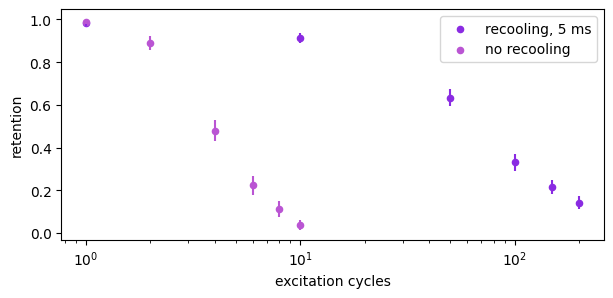

In [56]:
fig, ax = plt.subplots(sharey=True,figsize=(7,3))

# with 5 ms recooling after every excitation cycle
retention = np.array([0.98159509, 0.91304348, 0.63461538, 0.33103448, 0.21710526,
       0.14285714])
n_excitation_cycles = np.array([1,10,50,100,150,200])
loading = np.array([0.54333333, 0.53666667, 0.52      , 0.48333333, 0.50666667,
       0.46666667])
measurements = 300

color = 'blueviolet'
ax.scatter(n_excitation_cycles,retention,color=color,s=20,label='recooling, 5 ms')
ax.errorbar(n_excitation_cycles,retention,yerr=binomial_error(retention, measurements*loading),ls='',color=color)
ax.set_xlabel('excitation cycles')
ax.set_ylabel('retention')

# from 2024.12.09 - no recooling
retention1 = np.array([0.98863636, 0.88888889, 0.48, 0.22352941, 0.11290323, 0.03797468])
n_excitation_cycles = np.array([1, 2, 4, 6, 8, 10])
loading1 = np.array([0.33, 0.3, 0.325, 0.29, 0.255, 0.255])
measurements1 = 300 # number of measurements in the experiment code

color = 'mediumorchid'
ax.scatter(n_excitation_cycles,retention1,color=color,s=20,label='no recooling')
ax.errorbar(n_excitation_cycles,retention1,yerr=binomial_error(retention1, measurements1*loading1),ls='',color=color)
ax.set_xlabel('excitation cycles')
ax.set_ylabel('retention')

ax.set_xscale('log')
ax.legend(loc='best')

# axes[1].scatter(t_recooling,retention2,color=color)
# axes[1].errorbar(t_recooling,retention2,yerr=binomial_error(retention2, measurements2*loading2),ls='',color=color)
# axes[1].set_xlabel('recooling duration (ms)')

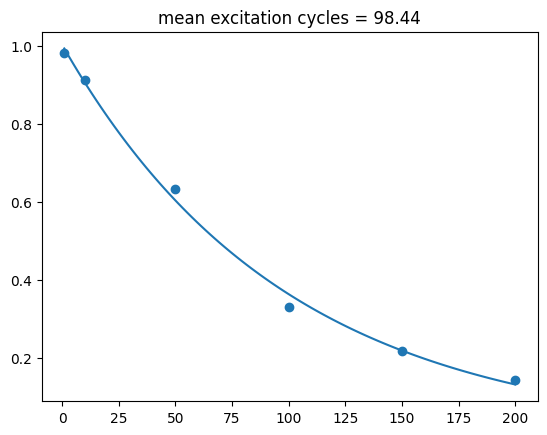

In [68]:
# given that the recooling retention data, what's the mean number of cycles an atom survives?
# the mean number of events t given a probability dist exp(-t/tau) is exactly t = tau.
model = lambda t, a, tau: a*np.exp(-t/tau)

retention = np.array([0.98159509, 0.91304348, 0.63461538, 0.33103448, 0.21710526,
       0.14285714])

n_excitation_cycles = np.array([1,10,50,100,150,200])

popt, pcov = curve_fit(model, n_excitation_cycles, retention)

xpts = np.linspace(1,200,100)

plt.title(f"mean excitation cycles = {popt[1]:.2f}")
plt.scatter(n_excitation_cycles, retention)
plt.plot(xpts, model(xpts, *popt))

In [66]:
print(popt)

[ 1.00441183 98.44210124]


In [63]:
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=None,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    nan_policy=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None

### 2024.12.13

Text(0.5, 0, 'collection window offset (ns)')

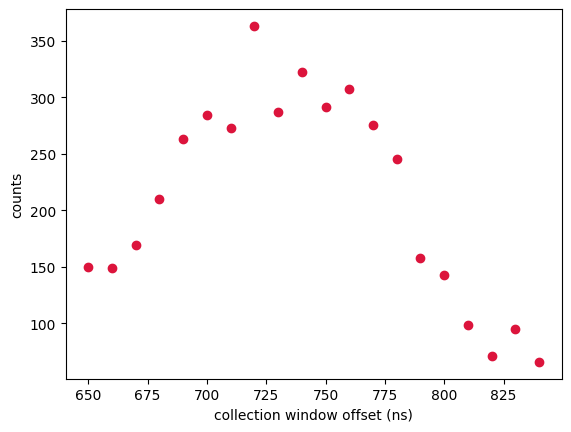

In [45]:
counts = np.array([150., 149., 169., 210., 263., 284., 273., 363., 287., 322., 291.,
        307., 275., 245., 158., 143.,  99.,  71.,  95.,  66.]),
# counts1 = np.array([150., 149., 169., 210., 263., 284., 273., 363., 287., 322., 291.,
#        307., 275., 245., 158., 143.,  99.,  71.,  95.,  66.])
t_array = np.array([650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
        780, 790, 800, 810, 820, 830, 840])

fig,ax = plt.subplots()
# ax.scatter(t_array, counts)
ax.scatter(t_array, counts, color='crimson')
# ax.errorbar(t_array, counts, yerr=poisson_err(counts))

tpts = np.array(t_array[0], t_array[-1])
gaussian = np.exp(-t**2/(2*sigma**2))

ax.set_ylabel("counts")
ax.set_xlabel("collection window offset (ns)")

In [43]:
4000*10e-7*10**5

400.0

### 2024.12.09

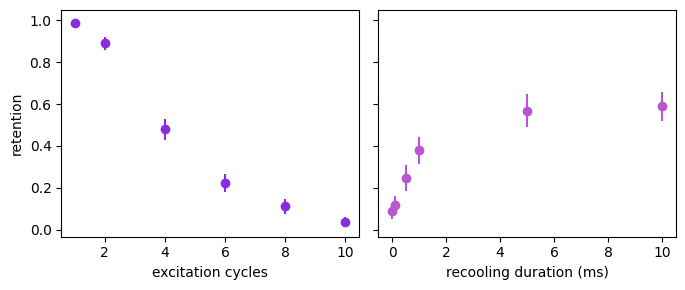

In [30]:
# from experiment __
retention1 = np.array([0.98863636, 0.88888889, 0.48, 0.22352941, 0.11290323, 0.03797468])
n_excitation_cycles = np.array([1, 2, 4, 6, 8, 10])
loading1 = np.array([0.33, 0.3, 0.325, 0.29, 0.255, 0.255])
measurements1 = 300 # number of measurements in the experiment code

retention2 = np.array([0.09090909, 0.11666667, 0.24615385, 0.37931034, 0.56862745, 0.58823529])
t_recooling = np.array([0.e+00, 1.e-04, 5.e-04, 1.e-03, 5.e-03, 1.e-02])*1e3
loading2 = np.array([0.29333333, 0.24, 0.25, 0.28333333, 0.20666667, 0.2633333])

measurements2 = 200 # number of measurements in the experiment code

color = 'blueviolet'

fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(7,3))
axes[0].scatter(n_excitation_cycles,retention1,color=color)
axes[0].errorbar(n_excitation_cycles,retention1,yerr=binomial_error(retention1, measurements1*loading1),ls='',color=color)
axes[0].set_xlabel('excitation cycles')
axes[0].set_ylabel('retention')

color = 'mediumorchid'

axes[1].scatter(t_recooling,retention2,color=color)
axes[1].errorbar(t_recooling,retention2,yerr=binomial_error(retention2, measurements2*loading2),ls='',color=color)
axes[1].set_xlabel('recooling duration (ms)')

fig.tight_layout()
# plt.savefig('retention_vs_excitation_cycles_and_recooling.svg',bbox_inches='tight')

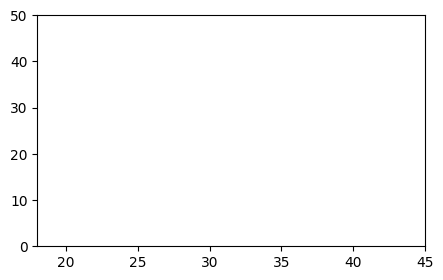

In [35]:
fig,ax = plt.subplots(figsize=(5,3))
ax.plot([],[])
ax.set_xlim((18,45))
ax.set_ylim((0,50))
plt.savefig('empty_ax.svg',bbox_inches='tight', transparent=True)